In [1]:
#Sensitivity analysis for the diffusion coefficient with sobol
import pandas as pd
import numpy as np

percorso_file_excel = 'Coefficienti.xlsx'


nome_foglio = 'Dt'

# Specifica le colonne da importare
colonne_da_importare = ['Symbol','Physical quantity', 'min', 'max']

# Leggi solo il foglio specifico e le colonne specifiche
df = pd.read_excel(percorso_file_excel, sheet_name=nome_foglio, usecols=colonne_da_importare)
df

,Symbol,Physical quantity,min,max
0,MW,Molecular weight,162.00,539.00
1,"log(P_{7,4 })",Log partition coefficient,-2.62,2.63
2,HD,Hydrogen donor,0.00,3.00
3,HA,Hydrogen acceptor,5.00,11.00
4,a,-5.2,NaN,NaN
5,b,-0.62,NaN,NaN
6,c,1.149,NaN,NaN
7,w,0.78,NaN,NaN
8,x,-3.67,NaN,NaN
9,y,-1.109,NaN,NaN


In [2]:
#Diffusion coefficient model
import numpy as np
a, b, c, w, x, y, z = -5.20, -0.62, 1.15, 0.78, -3.67, -1.11, -0.35
qoi = np.zeros((df.shape[0],1))

def Dt(input):
    MW, logP, HD, HA = input
    return np.exp(a + b * np.log(MW) + c/(1 + np.exp((logP - x + y * HD + z * HA) / w)))




In [3]:
import numpy as np

from SALib.test_functions import Ishigami
from SALib import ProblemSpec



sp = ProblemSpec({
    'names': ['MW', 'logP', 'HD', 'HA'],
    'bounds': [
        [df.loc[0,'min'], df.loc[0,'max']],  # bounds for MW
        [df.loc[1,'min'], df.loc[1,'max']],  # ... logP
        [df.loc[2,'min'], df.loc[2,'max']],   # ... HD
        [df.loc[3,'min'], df.loc[3,'max']]  #... HA
    ],
    'output' : ['Y']
})




In [4]:
#Sobol problem
sp.sample_sobol(1024, calc_second_order=True)
param_values = sp.samples
Y = np.zeros([param_values.shape[0]])

for i, X in enumerate(param_values):
    Y[i] = Dt(X)

# Provide the results to the interface
sp.set_results(Y)

Samples:
	4 parameters: ['MW', 'logP', 'HD', 'HA']
	10240 evaluations
Outputs:
	1 outputs: ['Y']
	10240 evaluations


In [5]:
sp.analyze_sobol()
print(sp)

Samples:
	4 parameters: ['MW', 'logP', 'HD', 'HA']
	10240 evaluations
Outputs:
	1 outputs: ['Y']
	10240 evaluations
Analysis:
            ST   ST_conf
MW    0.308742  0.027854
logP  0.506070  0.050872
HD    0.195892  0.022121
HA    0.080393  0.011177
            S1   S1_conf
MW    0.284110  0.052909
logP  0.438246  0.056906
HD    0.144697  0.033479
HA    0.055195  0.021015
                  S2   S2_conf
(MW, logP)  0.016251  0.094706
(MW, HD)    0.001169  0.089442
(MW, HA)   -0.010115  0.078443
(logP, HD)  0.034799  0.070107
(logP, HA)  0.011030  0.067033
(HD, HA)    0.006665  0.044656



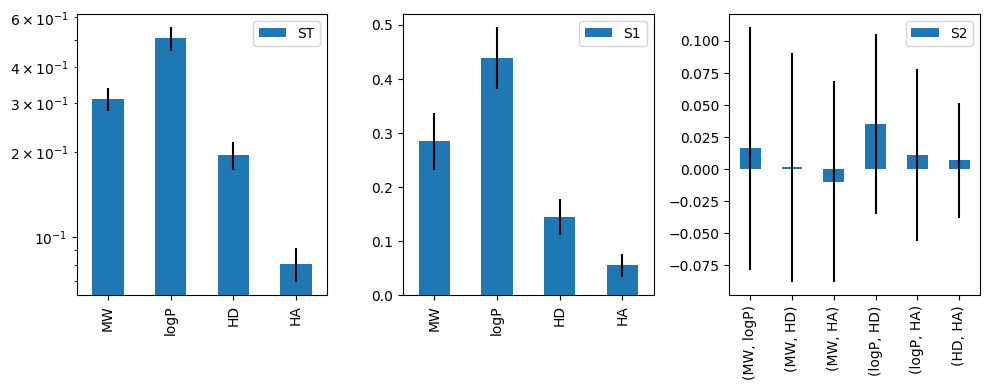

In [6]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


axes = sp.plot()
axes[0].set_yscale('log')
fig = plt.gcf()  # get current figure
fig.set_size_inches(10, 4)
plt.tight_layout()

In [7]:
#Maximum and minimum of the diffusion coefficients
from IPython.display import clear_output
min_D = 1
max_D = 0
for i in param_values:
    D = Dt(i)
    if D > max_D:
        max_D = D
    elif D < min_D:
        min_D = D


print(f"{min_D:.2e}")
print(f"{max_D:.2e}")


1.13e-04
7.41e-04
